In [38]:
import numpy as np
import pandas as pd
import datetime as dt
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import matplotlib.gridspec as gridspec

PATH = os.getcwd()

In [10]:
final_table = pd.read_csv(os.path.join(PATH, 'Tables', 'final_table.csv'))
final_table['Query'] = pd.to_datetime(final_table['Query']).dt.date
final_table.set_index('Query', inplace=True)
final_AAPL_table = final_table[final_table['Ticker']=='AAPL']
final_AAPL_table

,Ticker,big_log_ret,big_RCV,big_RVT,big_positivePartscr,big_negativePartscr,big_splogscr,big_linscr,big_lag1_log_ret,big_lag4_log_ret,big_lag1_month_log_ret
Query,,,,,,,,,,,
2012-01-08,AAPL,-0.006150,13.162167,0.003400,0.016050,0.015650,0.020333,48.380133,0.042066,-0.032534,0.070567
2012-01-15,AAPL,0.001166,11.965000,0.003967,0.016733,0.017183,0.015133,47.648250,-0.006150,0.056903,0.096951
2012-01-22,AAPL,0.062216,-10.776667,0.002933,0.017883,0.012883,0.037700,54.592783,0.001166,0.004132,0.041214
2012-01-29,AAPL,0.027346,-9.334000,0.003643,0.016486,0.012671,0.012314,59.969157,0.062216,0.042066,0.099298
2012-02-05,AAPL,0.070830,-33.438857,0.002343,0.017586,0.018871,-0.003371,45.843986,0.027346,-0.006150,0.084578
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,AAPL,0.011290,14.219143,0.002043,0.015886,0.035271,-0.124614,32.474271,0.007437,0.001751,0.048907
2021-11-07,AAPL,-0.008564,-26.448667,0.001233,0.017733,0.025000,-0.029433,42.823500,0.011290,0.013485,0.058446
2021-11-14,AAPL,0.068037,-4.524000,0.000933,0.018283,0.027900,-0.059650,39.823450,-0.008564,0.026234,0.036397


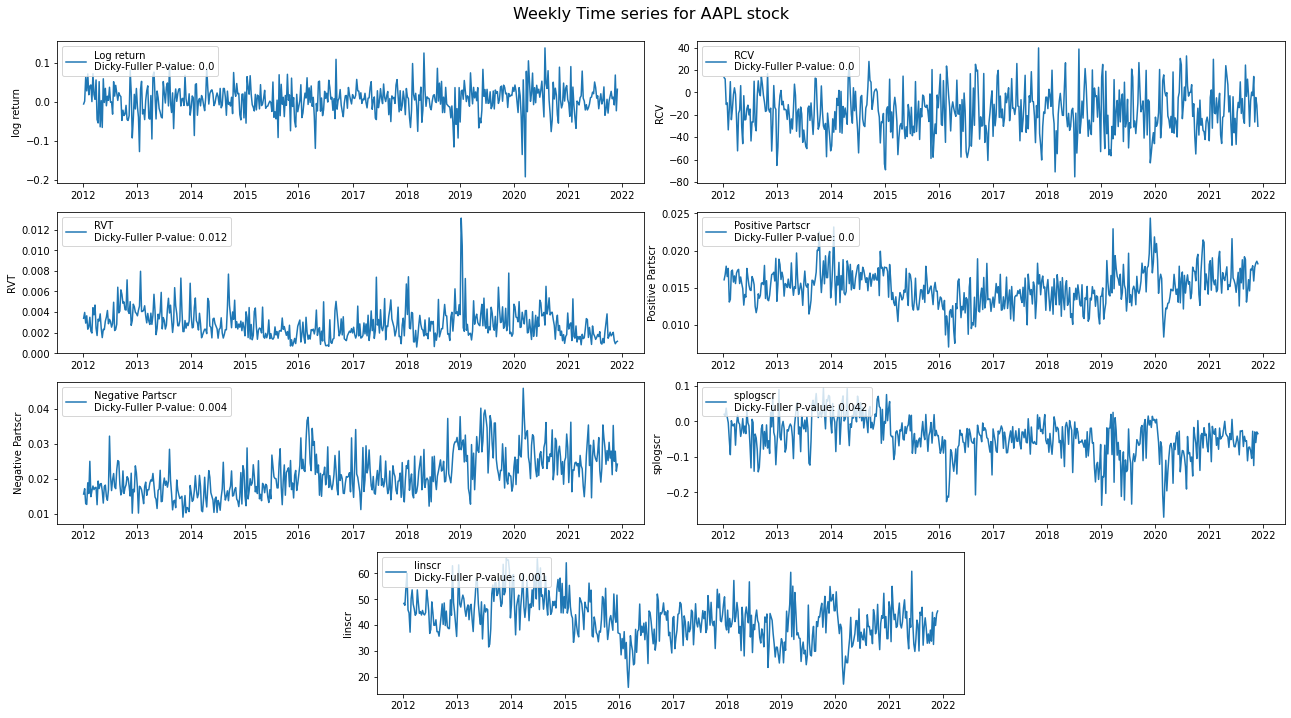

In [53]:
gs = gridspec.GridSpec(4, 4)

fig2 = plt.figure(figsize=(22,12))
fig2.suptitle('Weekly Time series for AAPL stock', fontsize=16, y=0.92)

ax = plt.subplot(gs[0, 0:2])
final_AAPL_table.big_log_ret.plot(kind='line', ax = ax, label= 'Log return \nDicky-Fuller P-value: {}'.format(np.round(adfuller(final_AAPL_table['big_log_ret'])[1], 3)))
ax.set_ylabel("log return")
ax.set(xlabel=None)
ax.legend(loc='upper left')

ax2 = plt.subplot(gs[0,2:])
final_AAPL_table.big_RCV.plot(kind='line', ax = ax2, label= 'RCV \nDicky-Fuller P-value: {}'.format(np.round(adfuller(final_AAPL_table['big_RCV'])[1], 3)))
ax2.set_ylabel("RCV")
ax2.set(xlabel=None)
ax2.legend(loc='upper left')

ax3 = plt.subplot(gs[1,0:2])
final_AAPL_table.big_RVT.plot(kind='line', ax = ax3, label= 'RVT \nDicky-Fuller P-value: {}'.format(np.round(adfuller(final_AAPL_table['big_RVT'])[1], 3)))
ax3.set_ylabel("RVT")
ax3.set(xlabel=None)
ax3.legend(loc='upper left')

ax4 = plt.subplot(gs[1,2:])
final_AAPL_table.big_positivePartscr.plot(kind='line', ax = ax4, label= 'Positive Partscr \nDicky-Fuller P-value: {}'.format(np.round(adfuller(final_AAPL_table['big_positivePartscr'])[1], 3)))
ax4.set_ylabel("Positive Partscr")
ax4.set(xlabel=None)
ax4.legend(loc='upper left')

ax5 = plt.subplot(gs[2,0:2])
final_AAPL_table.big_negativePartscr.plot(kind='line', ax = ax5, label= 'Negative Partscr \nDicky-Fuller P-value: {}'.format(np.round(adfuller(final_AAPL_table['big_negativePartscr'])[1], 3)))
ax5.set_ylabel("Negative Partscr")
ax5.set(xlabel=None)
ax5.legend(loc='upper left')

ax6 = plt.subplot(gs[2,2:])
final_AAPL_table.big_splogscr.plot(kind='line', ax = ax6, label= 'splogscr \nDicky-Fuller P-value: {}'.format(np.round(adfuller(final_AAPL_table['big_splogscr'])[1], 3)))
ax6.set_ylabel("splogscr")
ax6.set(xlabel=None)
ax6.legend(loc='upper left')

ax7 = plt.subplot(gs[3,1:3])
final_AAPL_table.big_linscr.plot(kind='line', ax = ax7, label= 'linscr \nDicky-Fuller P-value: {}'.format(np.round(adfuller(final_AAPL_table['big_linscr'])[1], 3)))
ax7.set_ylabel("linscr")
ax7.set(xlabel=None)
ax7.legend(loc='upper left')
plt.show()

In [18]:
# ADF stationarity test
# Returns: {Test statistic, P-value, Num lags used, {Critical values}, Estmation of maximized information criteria}
adfuller(final_AAPL_table['big_log_ret'])

(-23.106937251044585,
 0.0,
 0,
 515,
 {'1%': -3.4431115411022146,
  '5%': -2.8671684899522023,
  '10%': -2.5697677754736543},
 -1851.9506412082083)